<a href="https://colab.research.google.com/github/GinuraAdikari/InsightHive/blob/Recommendation_Engine/MetaPath2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns


import os

In [ ]:
# Load the events data
event_df=pd.read_csv('drive/MyDrive/Colab Notebooks/events.csv')
event_df

,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN
...,...,...,...,...,...
2756096,1438398785939,591435,view,261427,NaN
2756097,1438399813142,762376,view,115946,NaN
2756098,1438397820527,1251746,view,78144,NaN
2756099,1438398530703,1184451,view,283392,NaN


In [ ]:
event_df['visitorid'].value_counts()

,count
visitorid,
1150086,7757
530559,4328
152963,3024
895999,2474
163561,2410
...,...
141099,1
56281,1
1039644,1


In [ ]:
# Load the category tree data
category_tree=pd.read_csv('drive/MyDrive/Colab Notebooks/category_tree.csv')

category_tree.head()

,categoryid,parentid
0,1016,213.0
1,809,169.0
2,570,9.0
3,1691,885.0
4,536,1691.0


In [ ]:
# load item-related datasets
item1=pd.read_csv('drive/MyDrive/Colab Notebooks/item_properties_part1.csv')
item2=pd.read_csv('drive/MyDrive/Colab Notebooks/item_properties_part2.csv')

# Combine the item properties dataframes
item_properties = pd.concat([item1, item2])
item_properties.head(10)

,timestamp,itemid,property,value
0,1435460400000,460429,categoryid,1338
1,1441508400000,206783,888,1116713 960601 n277.200
2,1439089200000,395014,400,n552.000 639502 n720.000 424566
3,1431226800000,59481,790,n15360.000
4,1431831600000,156781,917,828513
5,1436065200000,285026,available,0
6,1434250800000,89534,213,1121373
7,1431831600000,264312,6,319724
8,1433646000000,229370,202,1330310
9,1434250800000,98113,451,1141052 n48.000


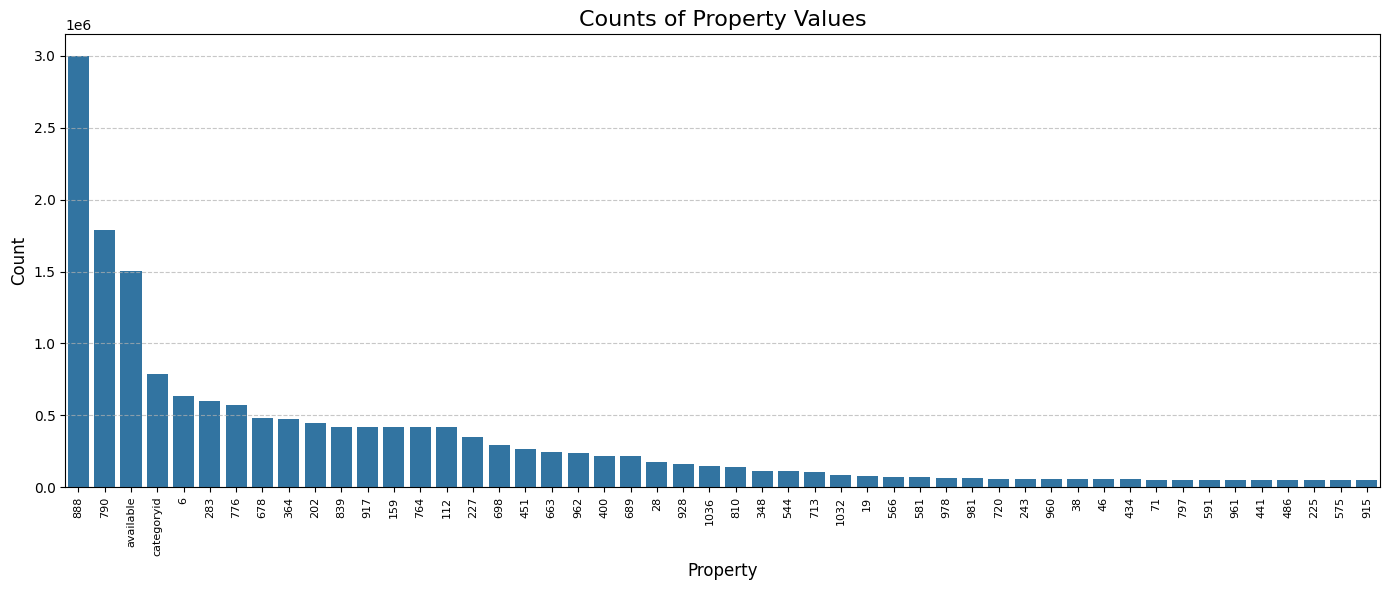

In [ ]:
# Group by 'property' and calculate counts
property_counts = item_properties['property'].value_counts().reset_index()
property_counts.columns = ['property', 'count']

top_50_properties = property_counts.head(50)

# Visualize the counts as a bar plot
plt.figure(figsize=(14, 6))
sns.barplot(x=top_50_properties['property'], y=property_counts['count'])
plt.xticks(rotation=90, fontsize=8)
plt.title('Counts of Property Values', fontsize=16)
plt.xlabel('Property', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
property_counts = item_properties['property'].value_counts()
threshold = 0.01 * len(item_properties)
frequent_properties = property_counts[property_counts > threshold].index
filtered_item_properties = item_properties[item_properties['property'].isin(frequent_properties)]


In [ ]:
len(item_properties['property'].unique())

In [ ]:
filtered_item_properties.shape

In [ ]:
filtered_item_properties['itemid'].nunique()

In [ ]:
filtered_item_properties['property'].value_counts().head(20)

In [ ]:
# Filter for items with at least 'categoryid' OR 'availability'
filtered_items = item_properties[item_properties['property'].isin(['categoryid', 'available'])]

filtered_items.shape

(2291853, 4)

In [ ]:
filtered_items

,timestamp,itemid,property,value
0,1435460400000,460429,categoryid,1338
5,1436065200000,285026,available,0
15,1437274800000,186518,available,0
79,1433646000000,423682,available,0
82,1434250800000,316253,available,1
...,...,...,...,...
9275873,1435460400000,444741,categoryid,511
9275879,1435460400000,97513,categoryid,1385
9275890,1433041200000,356167,available,0
9275892,1439089200000,200211,available,0


In [ ]:
filtered_items['property'].value_counts()

In [ ]:
# Filter for rows where 'property' is either 'categoryid' or 'availability'
filtered_items = item_properties[item_properties['property'].isin(['categoryid', 'available'])]

# Group by 'itemid' and count unique properties
item_property_counts = filtered_items.groupby('itemid')['property'].nunique()

# Filter for items with both properties (count == 2)
items_with_both_properties = item_property_counts[item_property_counts == 2]

# Get the number of such items
num_items_with_both = len(items_with_both_properties)

# Print the result
print(f"Number of items with both categoryid and availability: {num_items_with_both}")

Number of items with both categoryid and availability: 417053


In [ ]:
available_properties = item_properties[item_properties['property'] == 'available']

# Group by 'itemid' and count rows
filtered_items = filtered_items.groupby('itemid').size().reset_index(name='count')

# Sort by count in descending order
filtered_items = filtered_items.sort_values(by='count', ascending=False)

In [ ]:
filtered_items.head()

,timestamp,itemid,property,value
0,1435460400000,460429,categoryid,1338
5,1436065200000,285026,available,0
15,1437274800000,186518,available,0
79,1433646000000,423682,available,0
82,1434250800000,316253,available,1


In [ ]:
duplicates = filtered_items[filtered_items.duplicated(subset=['itemid', 'property', 'value'], keep=False)]
print(duplicates)
print(f"Number of duplicate rows: {len(duplicates)}")

             timestamp  itemid    property value
5        1436065200000  285026   available     0
15       1437274800000  186518   available     0
82       1434250800000  316253   available     1
96       1437274800000  430459   available     0
101      1433041200000  411262   available     0
...                ...     ...         ...   ...
9275856  1438484400000  225378   available     1
9275873  1435460400000  444741  categoryid   511
9275879  1435460400000   97513  categoryid  1385
9275892  1439089200000  200211   available     0
9275897  1436065200000   74745   available     0

[1534714 rows x 4 columns]
Number of duplicate rows: 1534714


In [ ]:
item_properties.shape

In [ ]:
category_tree['parentid'].value_counts()

,count
parentid,
250.0,31
362.0,22
1009.0,22
351.0,19
1259.0,18
...,...
1315.0,1
1671.0,1
44.0,1


In [ ]:
category_tree['categoryid'].value_counts()

,count
categoryid,
761,1
1016,1
809,1
570,1
1691,1
...,...
1140,1
1479,1
83,1


In [ ]:
filtered_items['value'].value_counts()

In [ ]:
# Convert 'value' column in filtered_items to int64 using .loc
filtered_items.loc[:, 'value'] = pd.to_numeric(filtered_items['value'], errors='coerce').astype('Int64')

# Now perform the merge
items_cats = pd.merge(filtered_items, category_tree, how='left', left_on='value', right_on='categoryid')
items_cats

,timestamp,itemid,property,value,categoryid,parentid
0,1435460400000,460429,categoryid,1338,1338.0,1278.0
1,1436065200000,285026,available,0,0.0,605.0
2,1437274800000,186518,available,0,0.0,605.0
3,1433646000000,423682,available,0,0.0,605.0
4,1434250800000,316253,available,1,1.0,854.0
...,...,...,...,...,...,...
2291848,1435460400000,444741,categoryid,511,511.0,724.0
2291849,1435460400000,97513,categoryid,1385,1385.0,1202.0
2291850,1433041200000,356167,available,0,0.0,605.0
2291851,1439089200000,200211,available,0,0.0,605.0


In [ ]:
len(items_cats['itemid'].unique())

417053

In [ ]:
items_cats['categoryid'].value_counts()

,count
categoryid,
0.0,863245
1.0,641420
1147.0,26890
546.0,24885
1613.0,21126
...,...
480.0,1
180.0,1
1341.0,1


In [ ]:
items_cats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2291853 entries, 0 to 2291852
Data columns (total 6 columns):
 #   Column      Dtype  
---  ------      -----  
 0   timestamp   int64  
 1   itemid      int64  
 2   property    object 
 3   value       object 
 4   categoryid  float64
 5   parentid    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 104.9+ MB


In [ ]:
items_cats['categoryid'] = items_cats['categoryid'].fillna('Unknown')
items_cats['parentid'] = items_cats['parentid'].fillna('Unknown')

In [ ]:
items_cats.isnull().sum()

,0
timestamp,0
itemid,0
property,0
value,0
categoryid,0
parentid,0


In [ ]:
# Sort by itemid and timestamp
items_cats_sorted = items_cats.sort_values(by=['itemid', 'timestamp'])

# Group by itemid
grouped = items_cats_sorted.groupby('itemid')

# Initialize an empty list to store the results
result_data = []

# Iterate through each group
for itemid, group in grouped:
    # Filter for 'available' property
    available_rows = group[group['property'] == 'available']

    # Iterate through available rows
    for i in range(len(available_rows) - 1):
        # Get current and next row
        current_row = available_rows.iloc[i]
        next_row = available_rows.iloc[i + 1]

        # Create a dictionary to store the new data
        new_row = current_row.to_dict()  # Start with all columns from current_row

        # Add new features
        new_row['from'] = current_row['timestamp']
        new_row['to'] = next_row['timestamp']

        # Determine 'availability' value
        if current_row['value'] == 0 and next_row['value'] == 1:
            new_row['availability'] = 0
        elif current_row['value'] == 1 and next_row['value'] == 0:
            new_row['availability'] = 1

        # Append to the result list
        result_data.append(new_row)

# Create a DataFrame from the result list
result_df = pd.DataFrame(result_data)


In [ ]:
result_df

,timestamp,itemid,property,value,categoryid,parentid,from,to,availability
0,1431226800000,1,available,1,1.0,854.0,1431226800000,1431831600000,1.0
1,1431831600000,1,available,0,0.0,605.0,1431831600000,1432436400000,NaN
2,1432436400000,1,available,0,0.0,605.0,1432436400000,1433041200000,NaN
3,1433041200000,1,available,0,0.0,605.0,1433041200000,1433646000000,NaN
4,1433646000000,1,available,0,0.0,605.0,1433646000000,1434250800000,NaN
...,...,...,...,...,...,...,...,...,...
1086581,1439089200000,466864,available,1,1.0,854.0,1439089200000,1439694000000,1.0
1086582,1439694000000,466864,available,0,0.0,605.0,1439694000000,1440298800000,NaN
1086583,1440298800000,466864,available,0,0.0,605.0,1440298800000,1440903600000,NaN
1086584,1440903600000,466864,available,0,0.0,605.0,1440903600000,1441508400000,NaN


In [ ]:
len(result_df['itemid'].unique())

67001

In [ ]:
result_df['categoryid'].value_counts()

In [ ]:
result_df['parentid'].value_counts()

In [ ]:
result_df.duplicated(subset=['itemid', 'value']).sum()

954188

In [ ]:
result_df.isnull().sum()

,0
timestamp,0
itemid,0
property,0
value,0
categoryid,0
parentid,0
from,0
to,0
availability,914838


In [ ]:
import pandas as pd

# Sort by itemid, from, and to
result_df_sorted = result_df.sort_values(by=['itemid', 'from', 'to'])

# Group by itemid and availability
grouped = result_df_sorted.groupby(['itemid', 'availability'])

# Initialize an empty list to store the processed rows
processed_rows = []

# Iterate through each group
for (itemid, availability), group in grouped:
    # If there are multiple rows with the same availability
    if len(group) > 1:
        # Update the 'to' value of the first row with the 'to' value of the last row
        first_row = group.iloc[0].copy()  # Create a copy to avoid modifying the original DataFrame
        first_row['to'] = group.iloc[-1]['to']
        processed_rows.append(first_row)
    else:
        # If only one row, keep it as is
        processed_rows.append(group.iloc[0])

# Create a new DataFrame from the processed rows
final_df = pd.DataFrame(processed_rows)

# Display the final DataFrame
final_df

,timestamp,itemid,property,value,categoryid,parentid,from,to,availability
0,1431226800000,1,available,1,1.0,854.0,1431226800000,1431831600000,1.0
22,1434250800000,6,available,1,1.0,854.0,1434250800000,1435460400000,1.0
34,1431226800000,15,available,0,0.0,605.0,1431226800000,1431831600000,0.0
42,1436670000000,15,available,1,1.0,854.0,1436670000000,1437274800000,1.0
54,1433041200000,16,available,0,0.0,605.0,1433041200000,1437879600000,0.0
...,...,...,...,...,...,...,...,...,...
1086539,1433646000000,466858,available,0,0.0,605.0,1433646000000,1434250800000,0.0
1086536,1431831600000,466858,available,1,1.0,854.0,1431831600000,1432436400000,1.0
1086553,1431831600000,466861,available,0,0.0,605.0,1431831600000,1441508400000,0.0
1086552,1431226800000,466861,available,1,1.0,854.0,1431226800000,1442113200000,1.0


In [ ]:
# 1. Extract itemid, categoryid, and parentid from items_cats where property is 'categoryid'
item_category_mapping = items_cats[items_cats['property'] == 'categoryid'][['itemid', 'categoryid', 'parentid']]

# 2. Convert itemid to string for matching
item_category_mapping['itemid'] = item_category_mapping['itemid'].astype(str)
final_df['itemid'] = final_df['itemid'].astype(str)

# 3. Replace categoryid and parentid in final_df using the mapping
final_df = pd.merge(final_df, item_category_mapping[['itemid', 'categoryid', 'parentid']], on='itemid', how='left', suffixes=('', '_new'))
final_df['categoryid'] = final_df['categoryid_new']  # Directly replace categoryid
final_df['parentid'] = final_df['parentid_new']  # Directly replace parentid
final_df = final_df.drop(columns=['categoryid_new', 'parentid_new'])  # Drop temporary columns

# Display the updated final_df
final_df

,timestamp,itemid,property,value,categoryid,parentid,from,to,availability
0,1431226800000,1,available,1,1114.0,113.0,1431226800000,1431831600000,1.0
1,1434250800000,6,available,1,1091.0,573.0,1434250800000,1435460400000,1.0
2,1431226800000,15,available,0,722.0,1110.0,1431226800000,1431831600000,0.0
3,1436670000000,15,available,1,722.0,1110.0,1436670000000,1437274800000,1.0
4,1433041200000,16,available,0,333.0,1497.0,1433041200000,1437879600000,0.0
...,...,...,...,...,...,...,...,...,...
210806,1433646000000,466858,available,0,1191.0,61.0,1433646000000,1434250800000,0.0
210807,1431831600000,466858,available,1,1191.0,61.0,1431831600000,1432436400000,1.0
210808,1431831600000,466861,available,0,1051.0,955.0,1431831600000,1441508400000,0.0
210809,1431226800000,466861,available,1,1051.0,955.0,1431226800000,1442113200000,1.0


In [ ]:
final_df.shape

(210811, 9)

In [ ]:
item_final = final_df.drop(columns=['property','value','timestamp'])
item_final

,itemid,categoryid,parentid,from,to,availability
0,1,1114.0,113.0,1431226800000,1431831600000,1.0
1,6,1091.0,573.0,1434250800000,1435460400000,1.0
2,15,722.0,1110.0,1431226800000,1431831600000,0.0
3,15,722.0,1110.0,1436670000000,1437274800000,1.0
4,16,333.0,1497.0,1433041200000,1437879600000,0.0
...,...,...,...,...,...,...
210806,466858,1191.0,61.0,1433646000000,1434250800000,0.0
210807,466858,1191.0,61.0,1431831600000,1432436400000,1.0
210808,466861,1051.0,955.0,1431831600000,1441508400000,0.0
210809,466861,1051.0,955.0,1431226800000,1442113200000,1.0


In [ ]:
item_final

,itemid,item_categoryid,item_parentid,from,to,availability
0,1,1114.0,113.0,1970-01-01 00:23:51.226800,1970-01-01 00:23:51.831600,1.0
1,6,1091.0,573.0,1970-01-01 00:23:54.250800,1970-01-01 00:23:55.460400,1.0
2,15,722.0,1110.0,1970-01-01 00:23:51.226800,1970-01-01 00:23:51.831600,0.0
3,15,722.0,1110.0,1970-01-01 00:23:56.670000,1970-01-01 00:23:57.274800,1.0
4,16,333.0,1497.0,1970-01-01 00:23:53.041200,1970-01-01 00:23:57.879600,0.0
...,...,...,...,...,...,...
210806,466858,1191.0,61.0,1970-01-01 00:23:53.646000,1970-01-01 00:23:54.250800,0.0
210807,466858,1191.0,61.0,1970-01-01 00:23:51.831600,1970-01-01 00:23:52.436400,1.0
210808,466861,1051.0,955.0,1970-01-01 00:23:51.831600,1970-01-01 00:24:01.508400,0.0
210809,466861,1051.0,955.0,1970-01-01 00:23:51.226800,1970-01-01 00:24:02.113200,1.0


In [ ]:
item_final['categoryid'].value_counts()

,count
categoryid,
769.0,6765
1674.0,5566
1613.0,5346
1404.0,5284
1680.0,4806
...,...
1314.0,1
831.0,1
229.0,1


In [ ]:
item_final.isnull().sum()

,0
itemid,0
item_categoryid,0
item_parentid,0
from,0
to,0
availability,0


In [ ]:
item_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210811 entries, 0 to 210810
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   itemid        210811 non-null  object 
 1   categoryid    210811 non-null  object 
 2   parentid      210811 non-null  object 
 3   from          210811 non-null  int64  
 4   to            210811 non-null  int64  
 5   availability  210811 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 9.7+ MB


In [ ]:
event_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2756101 entries, 0 to 2756100
Data columns (total 5 columns):
 #   Column         Dtype  
---  ------         -----  
 0   timestamp      int64  
 1   visitorid      int64  
 2   event          object 
 3   itemid         int64  
 4   transactionid  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 105.1+ MB


In [ ]:
event_df['is_transaction'] = event_df['transactionid'].notnull().astype(int)

In [ ]:
event_df.isnull().sum()

,0
timestamp,0
visitorid,0
event,0
itemid,0
transactionid,2733644
is_transaction,0


In [ ]:
event_df.drop(columns=['transactionid'], inplace=True)

In [ ]:
item_final['itemid'] = item_final['itemid'].astype(str)
item_final['categoryid'] = item_final['categoryid'].astype(str)
item_final['parentid'] = item_final['parentid'].astype(str)
item_final['categoryid'] = item_final['categoryid'].astype(str)

event_df['itemid'] = event_df['itemid'].astype(str)
event_df['visitorid'] = event_df['visitorid'].astype(str)


In [ ]:
len(filtered_items['itemid'].unique())

417053

In [ ]:
merged_df = pd.merge(event_df, item_final, on='itemid', how='left')

In [ ]:
merged_df.isnull().sum()

,0
timestamp,0
visitorid,0
event,0
itemid,0
is_transaction,0
categoryid,1562464
parentid,1562464
from,1562464
to,1562464
availability,1562464


In [ ]:
# Convert timestamps to datetime
event_df['timestamp'] = pd.to_datetime(event_df['timestamp'])
item_final['from'] = pd.to_datetime(item_final['from'])
item_final['to'] = pd.to_datetime(item_final['to'])

# Set 'itemid' as index in item_final for efficient lookup
item_final = final_df[['itemid', 'categoryid', 'parentid', 'from', 'to', 'availability']]

# Function to get availability for a given item and timestamp
def get_availability(itemid, timestamp):
    try:
        # Select rows for the given itemid
        item_data = item_final.loc[[itemid]]  # Use double brackets to ensure a DataFrame is returned

        # Find the row where the timestamp falls within the 'from' and 'to' range
        mask = (item_data['from'] <= timestamp) & (timestamp <= item_data['to'])

        # If a match is found, return the availability; otherwise, return NaN
        if mask.any():
            return item_data.loc[mask, 'availability'].iloc[0]  # Select the first matching row's availability
        else:
            return float('nan')  # Or any other appropriate value for missing availability
    except KeyError:
        # Handle case where itemid is not found in item_final
        return float('nan')

# Apply the function to event_df to get availability for each event
event_df['availability'] = event_df.apply(lambda row: get_availability(row['itemid'], row['timestamp']), axis=1)

# Display updated event_df
print(event_df)

In [ ]:
import pandas as pd

# Convert timestamp columns to datetime for comparison and merging
event_df['timestamp'] = pd.to_datetime(event_df['timestamp'])
item_final['from'] = pd.to_datetime(item_final['from'])
item_final['to'] = pd.to_datetime(item_final['to'])

# Rename columns to avoid conflicts after merging
item_final = item_final.rename(columns={'categoryid': 'item_categoryid', 'parentid': 'item_parentid'})

# Merge event_df and item_final based on 'itemid'
merged_df = pd.merge(event_df, item_final, on='itemid', how='left')

# Filter the merged DataFrame based on timestamp range
filtered_df = merged_df[
    (merged_df['from'] <= merged_df['timestamp']) & (merged_df['timestamp'] <= merged_df['to'])
]

# Select relevant columns and rename them back to original names
event_df = filtered_df[['visitorid', 'timestamp', 'itemid', 'event', 'is_transaction',
                         'item_categoryid', 'item_parentid', 'availability']]
event_df = event_df.rename(columns={'item_categoryid': 'categoryid', 'item_parentid': 'parentid'})

# Display the updated event_df
print(event_df)

        visitorid                     timestamp  itemid event  is_transaction  \
98        1076270 1970-01-01 00:23:53.222147345  262799  view               0   
99        1076270 1970-01-01 00:23:53.222147345  262799  view               0   
143        692195 1970-01-01 00:23:53.223138106  112792  view               0   
146        392042 1970-01-01 00:23:53.223790254   16813  view               0   
147        392042 1970-01-01 00:23:53.223790254   16813  view               0   
...           ...                           ...     ...   ...             ...   
6108754    639019 1970-01-01 00:23:58.400010258   47138  view               0   
6108764    611270 1970-01-01 00:23:58.397455397  432925  view               0   
6108765    611270 1970-01-01 00:23:58.397455397  432925  view               0   
6108774    701750 1970-01-01 00:23:58.399289446  296172  view               0   
6108775    701750 1970-01-01 00:23:58.399289446  296172  view               0   

        categoryid parentid

In [ ]:
event_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1225358 entries, 98 to 6108775
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   visitorid       1225358 non-null  object        
 1   timestamp       1225358 non-null  datetime64[ns]
 2   itemid          1225358 non-null  object        
 3   event           1225358 non-null  object        
 4   is_transaction  1225358 non-null  int64         
 5   categoryid      1225358 non-null  object        
 6   parentid        1225358 non-null  object        
 7   availability    1225358 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 84.1+ MB


In [ ]:
event_df.isnull().sum()

,0
visitorid,0
timestamp,0
itemid,0
event,0
is_transaction,0
categoryid,0
parentid,0
availability,0


In [ ]:
# Define a custom encoding for the event column
event_weight = {"view": 1, "addtocart": 2, "transaction": 3}  # Assign weights
event_df["event_encoded"] = event_df["event"].map(event_weight)

# Compute extra visitor-level features directly in event_df before splitting
visitor_features = event_df.groupby("visitorid").agg(
    total_interactions=("event", "count"),
    transaction_frequency=("is_transaction", "sum"),
    distinct_items=("itemid", "nunique")
).reset_index()

# Merge back into the original dataset
event_df = event_df.merge(visitor_features, on="visitorid", how="left")

# Ensure there are no NaN values (should not happen, but just in case)
#event_df.fillna(0, inplace=True)


event_df.head()

,visitorid,timestamp,itemid,event,is_transaction,categoryid,parentid,availability,event_encoded,total_interactions,transaction_frequency,distinct_items
0,1076270,1970-01-01 00:23:53.222147345,262799,view,0,324.0,1145.0,0.0,1,12,2,1
1,1076270,1970-01-01 00:23:53.222147345,262799,view,0,324.0,1145.0,1.0,1,12,2,1
2,692195,1970-01-01 00:23:53.223138106,112792,view,0,958.0,1041.0,0.0,1,1,0,1
3,392042,1970-01-01 00:23:53.223790254,16813,view,0,1173.0,805.0,0.0,1,8,0,2
4,392042,1970-01-01 00:23:53.223790254,16813,view,0,1173.0,805.0,1.0,1,8,0,2


In [ ]:
event_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1225358 entries, 0 to 1225357
Data columns (total 11 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   visitorid              1225358 non-null  object        
 1   timestamp              1225358 non-null  datetime64[ns]
 2   itemid                 1225358 non-null  object        
 3   is_transaction         1225358 non-null  int64         
 4   categoryid             1225358 non-null  object        
 5   parentid               1225358 non-null  object        
 6   availability           1225358 non-null  float64       
 7   event_encoded          1225358 non-null  int64         
 8   total_interactions     1225358 non-null  int64         
 9   transaction_frequency  1225358 non-null  int64         
 10  distinct_items         1225358 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(4)
memory usage: 102.8+ MB


In [ ]:
# Convert visitorid and itemid to string
event_df['visitorid'] = event_df['visitorid'].astype(str)
event_df['itemid'] = event_df['itemid'].astype(str)

# Convert categoryid and parentid to integers (removing decimals) unless they are 'Unknown'
event_df['categoryid'] = event_df['categoryid'].apply(lambda x: str(int(float(x))) if x != 'Unknown' else x)
event_df['parentid'] = event_df['parentid'].apply(lambda x: str(int(float(x))) if x != 'Unknown' else x)

# Convert availability to integer (ensuring 0 and 1)
event_df['availability'] = event_df['availability'].astype(int)

# Verify dtypes
print(event_df.dtypes)


visitorid                        object
timestamp                datetime64[ns]
itemid                           object
event                            object
is_transaction                    int64
categoryid                       object
parentid                         object
availability                      int64
event_encoded                     int64
total_interactions                int64
transaction_frequency             int64
distinct_items                    int64
dtype: object


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

event_df[['total_interactions', 'transaction_frequency', 'distinct_items']] = scaler.fit_transform(
    event_df[['total_interactions', 'transaction_frequency', 'distinct_items']]
)


In [ ]:
event_df.head()

,visitorid,timestamp,itemid,is_transaction,categoryid,parentid,availability,event_encoded,total_interactions,transaction_frequency,distinct_items
0,1076270,1970-01-01 00:23:53.222147345,262799,0,324,1145,0,1,-0.280092,-0.090051,-0.187546
1,1076270,1970-01-01 00:23:53.222147345,262799,0,324,1145,1,1,-0.280092,-0.090051,-0.187546
2,692195,1970-01-01 00:23:53.223138106,112792,0,958,1041,0,1,-0.308768,-0.153215,-0.187546
3,392042,1970-01-01 00:23:53.223790254,16813,0,1173,805,0,1,-0.290520,-0.153215,-0.173862
4,392042,1970-01-01 00:23:53.223790254,16813,0,1173,805,1,1,-0.290520,-0.153215,-0.173862


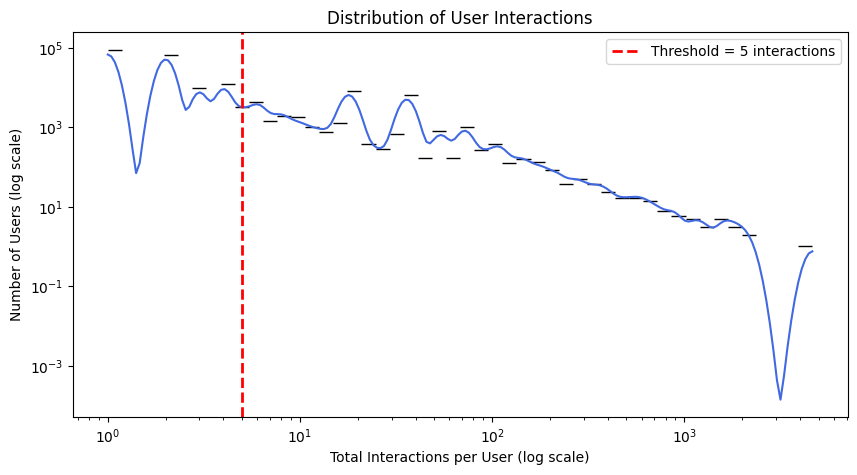

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count interactions per user
user_interaction_counts = event_df["visitorid"].value_counts()

# Plot the distribution of user interactions
plt.figure(figsize=(10, 5))
sns.histplot(user_interaction_counts, bins=50, log_scale=(True, True), kde=True, color="royalblue")

# Add a threshold line (example: 5 interactions)
threshold = 5
plt.axvline(threshold, color='red', linestyle='dashed', linewidth=2, label=f'Threshold = {threshold} interactions')

# Labels and title
plt.xlabel("Total Interactions per User (log scale)")
plt.ylabel("Number of Users (log scale)")
plt.title("Distribution of User Interactions")
plt.legend()
plt.show()


In [ ]:
threshold = 2

# Compute the number of low-active users and their proportion
low_active_users = user_interaction_counts[user_interaction_counts < threshold]
low_active_user_count = len(low_active_users)
total_users = len(user_interaction_counts)
low_active_user_proportion = low_active_user_count / total_users * 100  # Percentage

# Compute total interactions and the proportion from low-active users
total_interactions = user_interaction_counts.sum()
low_active_interactions = low_active_users.sum()
low_active_interaction_proportion = low_active_interactions / total_interactions * 100  # Percentage

(low_active_user_count, total_users, low_active_user_proportion, low_active_interactions, total_interactions, low_active_interaction_proportion)

(88448, 211269, 41.86511035693831, 88448, 1225358, 7.218135434705612)

In [ ]:
# Count interactions per user
user_interaction_counts = event_df['visitorid'].value_counts()

# Identify users with at least 2 interactions
active_users = user_interaction_counts[user_interaction_counts >= 2].index

# Filter event_df to keep only active users
filtered_event_df = event_df[event_df['visitorid'].isin(active_users)]

# Display the number of users before and after filtering
print(f"Original number of users: {len(user_interaction_counts)}")
print(f"Number of users after filtering: {len(active_users)}")
print(f"Remaining interactions: {len(filtered_event_df)}")

Original number of users: 211269
Number of users after filtering: 122821
Remaining interactions: 1136910


In [ ]:
filtered_event_df = event_df.copy()

In [ ]:
# Randomly shuffle the data
filtered_event_df = filtered_event_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Get all unique visitorids and itemids
all_users = set(filtered_event_df['visitorid'].unique())
all_items = set(filtered_event_df['itemid'].unique())

# Split the data into train/test based on the number of unique users and items
split_fraction = 0.8
split_index = int(len(filtered_event_df) * split_fraction)
train_data = filtered_event_df[:split_index]
test_data = filtered_event_df[split_index:]

# Identify seen users and items in the train data
seen_users = set(train_data['visitorid'].unique())
seen_items = set(train_data['itemid'].unique())

# Filter test data to include only users and items seen in the training data
test_data = test_data[test_data['visitorid'].isin(seen_users) & test_data['itemid'].isin(seen_items)]

# Ensure the test set does not have any new users/items
print("Number of unique visitors in train:", len(seen_users))
print("Number of unique visitors in test:", len(test_data['visitorid'].unique()))
print("Number of unique items in train:", len(seen_items))
print("Number of unique items in test:", len(test_data['itemid'].unique()))

Number of unique visitors in train: 190956
Number of unique visitors in test: 64200
Number of unique items in train: 30429
Number of unique items in test: 16384


In [ ]:
# Ensure there are no unseen visitors or items in the test set
unseen_visitors = set(test_data['visitorid'].unique()) - seen_users
unseen_items = set(test_data['itemid'].unique()) - seen_items

# Print the results
if unseen_visitors:
    print(f"Unseen visitors in test data: {unseen_visitors}")
else:
    print("No unseen visitors in test data.")

if unseen_items:
    print(f"Unseen items in test data: {unseen_items}")
else:
    print("No unseen items in test data.")


No unseen visitors in test data.
No unseen items in test data.


In [ ]:
train_data.shape

(980286, 12)

In [ ]:
test_data.shape

(221316, 12)

In [ ]:
# Sort the data by timestamp
event_df = event_df.sort_values(by=['timestamp'])

# Define a timestamp threshold for the split
split_time = event_df['timestamp'].quantile(0.8)

# Split into training and testing sets
train_data = event_df[event_df['timestamp'] <= split_time]
test_data = event_df[event_df['timestamp'] > split_time]

In [ ]:
train_data.value_counts().sum()

980286

In [ ]:
test_data.value_counts().sum()

27084

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 980286 entries, 659149 to 420803
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   visitorid              980286 non-null  object        
 1   timestamp              980286 non-null  datetime64[ns]
 2   itemid                 980286 non-null  object        
 3   is_transaction         980286 non-null  int64         
 4   categoryid             980286 non-null  object        
 5   parentid               980286 non-null  object        
 6   availability           980286 non-null  int64         
 7   event_encoded          980286 non-null  int64         
 8   total_interactions     980286 non-null  float64       
 9   transaction_frequency  980286 non-null  float64       
 10  distinct_items         980286 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 89.7+ MB


In [ ]:
import pandas as pd
import networkx as nx

In [ ]:
graph = nx.MultiDiGraph()

# --- Add Visitor Nodes ---
visitor_data = filtered_event_df.groupby('visitorid').agg(
    total_interactions=('visitorid', 'size'),
    transaction_frequency=('is_transaction', 'sum'),
    distinct_items=('itemid', 'nunique')
).reset_index()

for _, row in visitor_data.iterrows():
    graph.add_node(
        row['visitorid'],
        type='visitor',
        total_interactions=row['total_interactions'],
        transaction_frequency=row['transaction_frequency'],
        distinct_items=row['distinct_items']
    )

# --- Add Item Nodes ---
item_data = filtered_event_df[['itemid', 'availability', 'categoryid', 'parentid']].drop_duplicates(subset=['itemid'])

for _, row in item_data.iterrows():
    graph.add_node(
        row['itemid'],
        type='item',
        availability=row['availability'],
        categoryid=row['categoryid'],
        parentid=row['parentid']
    )

# --- Add Category Nodes ---
category_data = filtered_event_df[['categoryid', 'parentid']].drop_duplicates(subset=['categoryid'])

for _, row in category_data.iterrows():
    graph.add_node(
        row['categoryid'],
        type='category',
        parentid=row['parentid']
    )

In [ ]:
# --- Add Edges ---

# 1. Visitor → Item (interaction edges)
for _, row in filtered_event_df.iterrows():
    graph.add_edge(
        row['visitorid'], row['itemid'],
        type='interaction',  # Generic interaction edge
        event_encoded=row['event_encoded'],  # Encoded event type
        is_transaction=row['is_transaction'],
        timestamp=row['timestamp']
    )

# 2. Item → Category (item-category edges)
for _, row in item_data.iterrows():
    graph.add_edge(
        row['itemid'], row['categoryid'],
        type='belongs_to',  # Link from item to its category
        availability=row['availability']
    )

# 3. Category → Parent Category (category hierarchy)
for _, row in category_data.iterrows():
    graph.add_edge(
        row['categoryid'], row['parentid'],
        type='sub_category_of',  # Indicates the hierarchical relationship
        relationship='child_of'  # Parent-child relationship
    )

# 4. Visitor → Category (visitor-item-category edges)
for _, row in filtered_event_df.iterrows():
    graph.add_edge(
        row['visitorid'], row['categoryid'],
        type='visitor-category',  # Relationship between visitor and category
        event_encoded=row['event_encoded'],  # Encoded event type
        is_transaction=row['is_transaction'],
        timestamp=row['timestamp']
    )

# 5. Item → Parent Category (item-parent category edges)
for _, row in item_data.iterrows():
    graph.add_edge(
        row['itemid'], row['parentid'],
        type='belongs_to_parent',  # Link from item to its parent category
        availability=row['availability']
    )


In [ ]:
# Print graph summary
print(f"Name: {graph.name}")
print(f"Type: {type(graph)}")
print(f"Number of nodes: {graph.number_of_nodes()}")
print(f"Number of edges: {graph.number_of_edges()}")
print(f"Average degree: {sum(dict(graph.degree()).values()) / float(graph.number_of_nodes())}")

Name: 
Type: <class 'networkx.classes.multidigraph.MultiDiGraph'>
Number of nodes: 239234
Number of edges: 2515552
Average degree: 21.030054256502


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27084 entries, 415539 to 658471
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   visitorid              27084 non-null  object        
 1   timestamp              27084 non-null  datetime64[ns]
 2   itemid                 27084 non-null  object        
 3   is_transaction         27084 non-null  int64         
 4   categoryid             27084 non-null  object        
 5   parentid               27084 non-null  object        
 6   availability           27084 non-null  int64         
 7   event_encoded          27084 non-null  int64         
 8   total_interactions     27084 non-null  float64       
 9   transaction_frequency  27084 non-null  float64       
 10  distinct_items         27084 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 2.5+ MB


In [ ]:
from collections import defaultdict

node_type_counts = defaultdict(int)

for node, data in graph.nodes(data=True):  # Iterate with data=True to get node attributes
    node_type = data.get('type', 'unknown')  # Access the 'type' attribute, default to 'unknown' if not found
    node_type_counts[node_type] += 1

# Print the counts
for node_type, count in node_type_counts.items():
    print(f"Node Type: {node_type}, Count: {count}")

Node Type: visitor, Count: 206383
Node Type: item, Count: 31990
Node Type: category, Count: 856
Node Type: unknown, Count: 220


In [ ]:
edge_type_counts = defaultdict(int)

for u, v, data in graph.edges(data=True):  # Iterate with data=True to access edge attributes
    edge_type = data['type']
    edge_type_counts[edge_type] += 1

# Print the counts
for edge_type, count in edge_type_counts.items():
    print(f"Edge Type: {edge_type}, Count: {count}")

Edge Type: view, Count: 1161438
Edge Type: visitor-category, Count: 1225358
Edge Type: addtocart, Count: 47964
Edge Type: transaction, Count: 15956
Edge Type: belongs_to, Count: 31990
Edge Type: belongs_to_parent, Count: 31990
Edge Type: sub_category_of, Count: 856


Encode the ids if the model fails to deliver. Maybe frequency encoding

In [ ]:
import random

def check_sample_node_dtype(graph, test_df, node_type, test_column):
    """
    Checks if a sample node of a given type in the graph has the same data type as the test dataset.

    Parameters:
        graph (nx.Graph): The constructed graph.
        test_df (pd.DataFrame): The test dataset.
        node_type (str): The type of node to check.
        test_column (str): Corresponding column in test data to compare.

    Returns:
        None (prints mismatch if found)
    """
    # Get all nodes of the given type
    nodes = [n for n, attrs in graph.nodes(data=True) if attrs.get('type') == node_type]

    if not nodes:
        print(f"⚠️ No nodes found for type: {node_type}")
        return

    # Pick a random node
    sample_node = random.choice(nodes)
    node_value = sample_node  # Assuming node ID represents the value
    test_value = test_df[test_column].dropna().iloc[0]  # Pick first non-null value

    # Compare data types
    node_dtype = type(node_value).__name__
    test_dtype = test_value.dtype.name if hasattr(test_value, "dtype") else type(test_value).__name__

    if node_dtype != test_dtype:
        print(f"Mismatch in {node_type}: Graph has {node_dtype}, Test Data has {test_dtype}")
    else:
        print(f" {node_type} data type matches: {node_dtype}")

# Check data types for visitor, item, and category
check_sample_node_dtype(graph, test_data, "visitor", "visitorid")
check_sample_node_dtype(graph, test_data, "item", "itemid")
check_sample_node_dtype(graph, test_data, "category", "categoryid")


 visitor data type matches: str
 item data type matches: str
 category data type matches: str


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


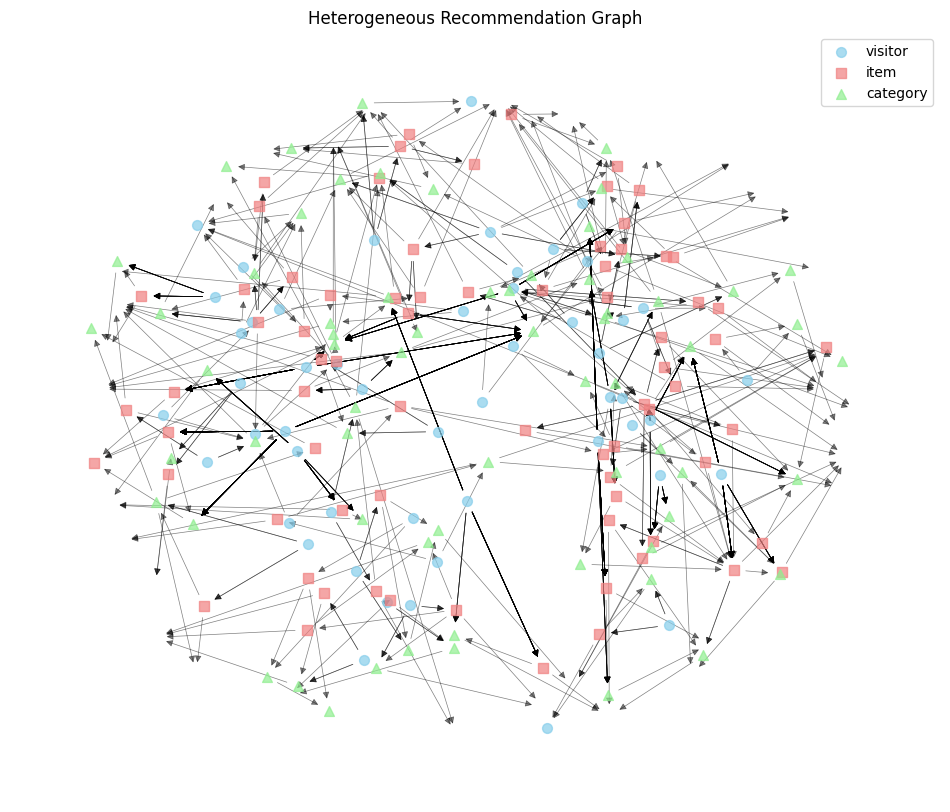

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# 1. Sample visitor nodes
sampled_visitors = list(graph.nodes)[:50]  # Adjust sample size as needed
sampled_visitors = [node for node in sampled_visitors if graph.nodes[node]['type'] == 'visitor']

# 2. Get connected items and categories
connected_nodes = set()
for visitor in sampled_visitors:
    for neighbor in graph.neighbors(visitor):
        connected_nodes.add(neighbor)
        # Add neighbors of neighbors (categories) if needed
        for neighbor_of_neighbor in graph.neighbors(neighbor):
            connected_nodes.add(neighbor_of_neighbor)

# 3. Create subgraph with sampled visitors and connected nodes
subgraph_nodes = list(sampled_visitors) + list(connected_nodes)
subgraph = graph.subgraph(subgraph_nodes)

# 2. Define node shapes and colors based on type
node_shapes = {'visitor': 'o', 'item': 's', 'category': '^'}  # Circle, square, triangle
node_colors = {'visitor': 'skyblue', 'item': 'lightcoral', 'category': 'lightgreen'}

# 3. Create the visualization
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(subgraph, k=0.3)  # Adjust k for node spacing

for node_type in node_shapes:
    nodes = [node for node, data in subgraph.nodes(data=True) if data.get('type') == node_type]
    nx.draw_networkx_nodes(
        subgraph, pos,
        nodelist=nodes,
        node_shape=node_shapes[node_type],
        node_color=node_colors[node_type],
        node_size=50,  # Adjust size as needed
        alpha=0.7,
        label=node_type  # Add label for legend
    )

# Draw edges (you might want to customize edge styles based on type)
nx.draw_networkx_edges(subgraph, pos, arrows=True, width=0.5, alpha=0.5)

# Add legend
plt.legend(scatterpoints=1)

plt.title("Heterogeneous Recommendation Graph")
plt.axis('off')
plt.show()

In [ ]:
event_df['parentid'].value_counts()

,count
parentid,
250.0,273946
679.0,118838
620.0,60749
955.0,35038
312.0,32049
...,...
1327.0,2
1175.0,1
1632.0,1


In [ ]:
metapath = [
    ('visitor', 'interaction', 'item'),  # Visitor interacts with item
    ('item', 'belongs_to', 'category'),  # Item belongs to a category
    ('category', 'sub_category_of', 'category'),  # Category has a parent category
    ('category', 'visitor-category', 'visitor'),  # Visitor is associated with categories through item interactions
    ('item', 'belongs_to_parent', 'category')  # Item also linked to parent category
]


In [ ]:
# Adjusting the random walk function with longer walks and better weighting
def metapath_random_walk(graph, metapath, start_node, walk_length=100):
    walk = [start_node]
    current_node = start_node
    for step in range(walk_length - 1):
        next_type = metapath[(step + 1) % len(metapath)][2]
        neighbors = [
            n for n in graph.neighbors(current_node)
            if 'type' in graph.nodes[n] and graph.nodes[n]['type'] == next_type
        ]

        if not neighbors:
            break  # No valid neighbors

        weighted_neighbors = []
        for n in neighbors:
            edge_data = graph.get_edge_data(current_node, n)
            interaction_count = edge_data[0].get('interaction_count', 1)  # Adjust this for more meaningful weights
            event_encoded = edge_data[0].get('event_encoded', 1)
            weighted_neighbors.append((n, interaction_count * event_encoded))  # Combine edge data

        if not weighted_neighbors:
            break  # No valid edges with weights

        neighbors, weights = zip(*weighted_neighbors)
        current_node = random.choices(neighbors, weights=weights)[0]
        walk.append(current_node)
    return walk

In [ ]:
import random
import numpy as np
from gensim.models import Word2Vec
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error
from time import time

# Assuming you have the `metapath_random_walk` and `graph` defined previously

# Define a function to train the model with hyperparameters and evaluate performance
def train_and_evaluate(graph, metapath, walk_length, vector_size, window_size, epochs, num_walks=10):
    walks = []
    for node in graph.nodes:
        if 'type' in graph.nodes[node] and graph.nodes[node]['type'] == metapath[0][0]:
            for _ in range(num_walks):  # Generate multiple walks for each node
                walks.append(metapath_random_walk(graph, metapath, node, walk_length=walk_length))

    # Train the Word2Vec model
    model = Word2Vec(
        walks,
        vector_size=vector_size,
        window=window_size,
        min_count=1,
        workers=4,
        sg=1,
        epochs=epochs
    )

    # Evaluate the model (Here, you can replace this with your own evaluation method)
    # For simplicity, let's assume a simple evaluation based on reconstruction error (you can use more advanced metrics)
    embeddings = model.wv
    mse = mean_squared_error(embeddings.vectors.mean(axis=0), np.zeros(embeddings.vector_size))  # Placeholder evaluation metric

    return mse  # Lower MSE means better performance


# Hyperparameter grid
param_grid = {
    'walk_length': [10, 30, 50],
    'vector_size': [64, 128, 256],
    'window_size': [5, 10, 15],
    'epochs': [10, 20],
    'num_walks': [5, 10]
}

# Create parameter grid
grid = ParameterGrid(param_grid)

# Track the best parameters
best_score = float('inf')
best_params = {}

# Hyperparameter tuning loop
for params in grid:
    print(f"Testing params: {params}")

    # Start timing
    start_time = time()

    mse = train_and_evaluate(
        graph,
        metapath,
        walk_length=params['walk_length'],
        vector_size=params['vector_size'],
        window_size=params['window_size'],
        epochs=params['epochs'],
        num_walks=params['num_walks']
    )

    # End timing
    end_time = time()
    print(f"Time taken: {end_time - start_time:.2f}s")

    # If this is the best result, update best score and parameters
    if mse < best_score:
        best_score = mse
        best_params = params
    print(f"Current MSE: {mse}\n")

# Output the best hyperparameters
print(f"Best MSE: {best_score}")
print(f"Best parameters: {best_params}")


Testing params: {'epochs': 10, 'num_walks': 5, 'vector_size': 64, 'walk_length': 10, 'window_size': 5}
Time taken: 66.87s
Current MSE: 0.005609341848614281

Testing params: {'epochs': 10, 'num_walks': 5, 'vector_size': 64, 'walk_length': 10, 'window_size': 10}
Time taken: 70.64s
Current MSE: 0.005947186450416802

Testing params: {'epochs': 10, 'num_walks': 5, 'vector_size': 64, 'walk_length': 10, 'window_size': 15}
Time taken: 73.26s
Current MSE: 0.006092216775451526

Testing params: {'epochs': 10, 'num_walks': 5, 'vector_size': 64, 'walk_length': 30, 'window_size': 5}
Time taken: 68.52s
Current MSE: 0.005617795536205193

Testing params: {'epochs': 10, 'num_walks': 5, 'vector_size': 64, 'walk_length': 30, 'window_size': 10}
Time taken: 68.92s
Current MSE: 0.0059414790971760514

Testing params: {'epochs': 10, 'num_walks': 5, 'vector_size': 64, 'walk_length': 30, 'window_size': 15}
Time taken: 72.03s
Current MSE: 0.006071478311414356

Testing params: {'epochs': 10, 'num_walks': 5, 'vecto

In [ ]:
import random
from gensim.models import Word2Vec

# Hyperparameters
num_walks = 100
walk_length = 50
vector_size = 256
window_size = 5
epochs = 10

walks = []
for node in graph.nodes:
    # Ensure node is of correct type for metapath
    if 'type' in graph.nodes[node] and graph.nodes[node]['type'] == metapath[0][0]:
        for _ in range(num_walks):
            walk = metapath_random_walk(graph, metapath, node, walk_length=walk_length)
            walks.append([str(n) for n in walk])  # Convert to strings

# Shuffle walks to prevent order bias
random.shuffle(walks)

# Train Word2Vec on the improved walks
model = Word2Vec(
    walks,
    vector_size=vector_size,
    window=window_size,
    min_count=1,
    workers=4,
    sg=1,
    epochs=epochs
)

# Save the model
model.save("improved_metapath2vec_model")

# Print sample vocabulary
print("Sample Vocabulary:", list(model.wv.index_to_key[:10]))


Sample Vocabulary: ['1051', '1143', '1606', '959', '646', '1483', '683', '491', '5', '1613']


In [ ]:
isolated_nodes = [node for node in graph.nodes() if len(list(graph.neighbors(node))) == 0]
isolated_in_vocab = [node for node in isolated_nodes if str(node) in model.wv.index_to_key]

print(f"Isolated Nodes in Graph: {len(isolated_nodes)}")
print(f"Isolated Nodes in Model Vocabulary: {len(isolated_in_vocab)}")


Isolated Nodes in Graph: 186
Isolated Nodes in Model Vocabulary: 0


In [ ]:
unique_nodes_in_walks = set(n for walk in walks for n in walk)
print(f"Nodes Covered in Walks: {len(unique_nodes_in_walks)} / {len(graph.nodes())}")

Nodes Covered in Walks: 207122 / 239234


In [ ]:
from gensim.models import Word2Vec

walks = []
for node in graph.nodes:
    # Check if the node has a 'type' attribute before accessing it
    if 'type' in graph.nodes[node] and graph.nodes[node]['type'] == metapath[0][0]:  # Compare with the first element of the first tuple in metapath
        walks.append(metapath_random_walk(graph, metapath, node, walk_length=100))

# Train the Word2Vec model on the metapath-guided random walks
model = Word2Vec(
    walks,
    vector_size=128,  # Embedding size
    window=10,         # Context window size
    min_count=1,      # Ignore nodes with frequency less than this
    workers=4,        # Number of threads
    sg=1,              # Use skip-gram (1) or CBOW (0)
    epochs=20         # Number of training epochs
)

# Save the model
model.save("metapath2vec_model")

In [ ]:
missing_items = set(test_data['itemid']) - set(model.wv.index_to_key)
print(f"Missing Items in Model Vocabulary: {len(missing_items)} / {len(test_data['itemid'].unique())} ({len(missing_items)/len(test_data['itemid'].unique())*100:.2f}%)")


Missing Items in Model Vocabulary: 16352 / 16384 (99.80%)


In [ ]:
graph_nodes = set(graph.nodes)
train_items = set(train_data['itemid'].unique())
missing_from_graph = train_items - graph_nodes

print(f"Items in Train Data but Missing from Graph: {len(missing_from_graph)} / {len(train_items)}")


Items in Train Data but Missing from Graph: 0 / 30429


In [ ]:
# Sample few node IDs from the graph
print("Sample Node IDs in Graph:", list(graph.nodes)[:5])

# Sample few item IDs from train data
print("Sample Item IDs in Train Data:", train_data['itemid'].astype(str).unique()[:5])


Sample Node IDs in Graph: ['0', '10', '1000', '10000', '1000006']
Sample Item IDs in Train Data: ['192569' '144761' '463280' '209163' '31230']


In [ ]:
# Check format of item IDs in the model's vocabulary
print("Sample Item IDs in Model Vocabulary:", list(model.wv.index_to_key)[:5])

# Ensure IDs in model vocabulary match train data IDs
missing_items_from_vocab = train_items - set(model.wv.index_to_key)
print(f"Items Missing from Model Vocabulary: {len(missing_items_from_vocab)} / {len(train_items)}")


Sample Item IDs in Model Vocabulary: ['1051', '1143', '1606', '959', '646']
Items Missing from Model Vocabulary: 30365 / 30429


In [ ]:
isolated_nodes = [node for node in graph.nodes() if len(list(graph.neighbors(node))) == 0]
print(f"Number of Isolated Nodes: {len(isolated_nodes)}")

Number of Isolated Nodes: 186


In [ ]:
from sklearn.preprocessing import LabelEncoder

# 1. Encode 'event' in the event_df (visitor-item edge)
event_encoder = LabelEncoder()
test_data.loc[:, 'event_encoded'] = event_encoder.fit_transform(test_data['event'])


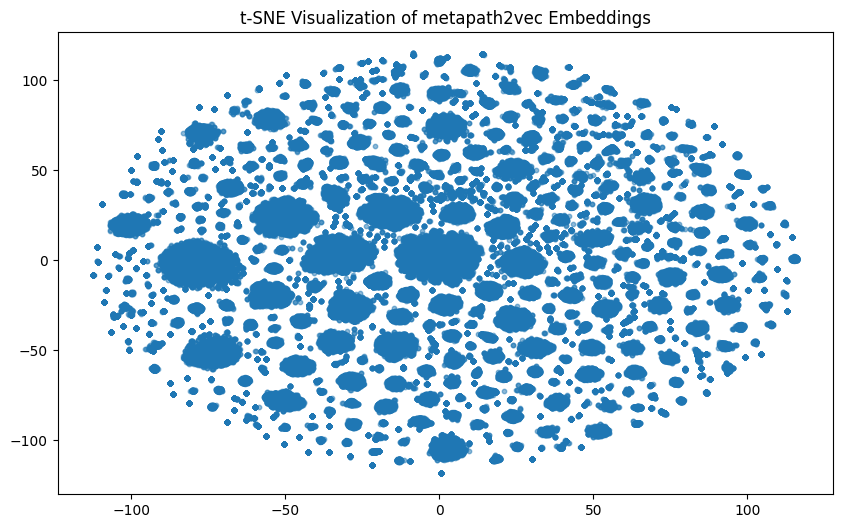

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE

# Extract all embeddings
keys = list(model.wv.index_to_key)  # Get all words in the vocab
embeddings = np.array([model.wv[key] for key in keys])  # Get their vectors

# Reduce dimensions using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
reduced_embeddings = tsne.fit_transform(embeddings)

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], alpha=0.5, s=10)
plt.title("t-SNE Visualization of metapath2vec Embeddings")
plt.show()


In [ ]:
mean_embedding = np.mean(embeddings, axis=0)
std_embedding = np.std(embeddings, axis=0)

print("Mean:", mean_embedding)
print("Standard Deviation:", std_embedding)


Mean: [ 2.1588232e-03 -7.6838909e-03  3.7164732e-03  2.4170931e-03
  3.7524044e-03 -3.7266938e-03  3.5828692e-04 -5.5196154e-04
 -2.5975658e-03  2.0879058e-03  7.0714247e-03 -8.5886422e-04
 -4.6592732e-03 -3.0913725e-03  6.4554070e-03  5.2904529e-03
 -3.0700744e-03  1.7387083e-03 -3.8929493e-03  2.9288044e-03
  3.7510626e-03  7.1284240e-03 -2.8213237e-03 -8.5820947e-03
 -8.7585747e-03  4.3492028e-03 -6.2387250e-03  3.3826302e-03
  2.3281276e-03 -4.2615831e-03 -4.5580780e-03  1.1721529e-03
  1.6938904e-04  3.4927756e-03 -4.1029891e-03  3.7371512e-03
  9.4987350e-03 -1.2217789e-03  4.8239296e-03  3.2631974e-04
 -2.9811445e-03  4.2741057e-03 -4.8505608e-04 -2.9259655e-03
  4.5300252e-03  1.2773391e-03 -4.2915880e-03 -3.4652767e-03
 -2.4203320e-03  2.4243647e-03  5.2580638e-03  1.2115460e-03
  4.0868996e-03  2.5846884e-03  6.6363136e-05  1.2692396e-03
  9.6352473e-03 -2.1708435e-03 -4.0904530e-03  1.7374991e-03
 -1.4684813e-03 -1.6926585e-03  4.1232454e-03  1.1139523e-03
  5.7663401e-03 -1

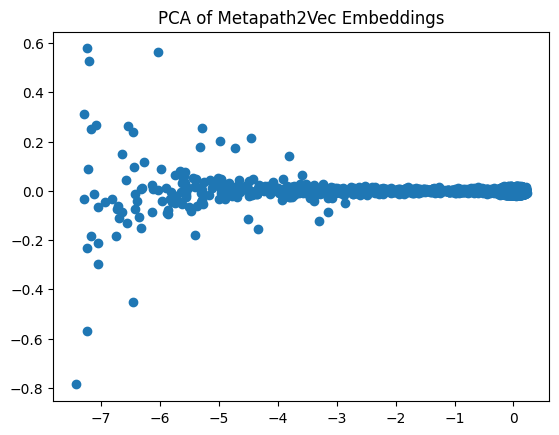

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1])
plt.title("PCA of Metapath2Vec Embeddings")
plt.show()


In [ ]:
from gensim.models import Word2Vec

# Load the trained Metapath2Vec model
model = Word2Vec.load("metapath2vec_model")

In [ ]:
recommendations = {}

# Get the most popular items in the training data
popular_items = train_data['itemid'].value_counts().index.tolist()

# Update recommendations for cold-start visitors
for visitor_id in test_data['visitorid'].unique():
    if visitor_id not in model.wv:
        # Provide default recommendations (e.g., top 10 popular items)
        recommendations[visitor_id] = popular_items[:10]

In [ ]:
# Load model for similarity-based recommendations
model = Word2Vec.load("improved_metapath2vec_model")

# Generate recommendations for sampled test users
recommendations = {}
for visitor_id in test_data['visitorid'].unique():
    try:
        visitor_embedding = model.wv[visitor_id]
        similar_items = model.wv.most_similar(str(visitor_id), topn=10)
        recommendations[visitor_id] = [item[0] for item in similar_items]
    except KeyError:
        # Handle cases where visitor ID is not in the model's vocabulary
        recommendations[visitor_id] = []  # Or some default recommendations

# Print the recommendations for the sampled test set
for visitor_id, recommended_items in recommendations.items():
    print(f"Recommendations for visitor {visitor_id}: {recommended_items}")

Streaming output truncated to the last 5000 lines.
Recommendations for visitor 1011872: ['317419', '1227899', '1337652', '465949', '419780', '704816', '293840', '89429', '802627', '650219']
Recommendations for visitor 223522: ['1191976', '1238652', '1075958', '113706', '596970', '287180', '1038348', '933613', '388922', '543261']
Recommendations for visitor 599506: ['1405798', '1372213', '231706', '1178210', '168538', '733958', '1170533', '11134', '366665', '906005']
Recommendations for visitor 765753: ['340298', '612921', '857366', '1068405', '1090793', '319763', '947141', '579190', '459294', '491893']
Recommendations for visitor 343131: ['478171', '1359533', '790417', '604511', '1053267', '991835', '483926', '664767', '445789', '717643']
Recommendations for visitor 1275619: ['76928', '1221263', '1164196', '336089', '719505', '1135312', '731356', '312473', '593916', '918379']
Recommendations for visitor 1381946: ['956239', '55691', '505455', '417189', '552317', '539252', '1250967', '28

In [ ]:
# Sample 5 item IDs from model and test dataset
print("Sample Item IDs in Model Vocabulary:", list(model.wv.index_to_key)[:5])
print("Sample Item IDs in Test Data:", test_data['itemid'].astype(str).unique()[:5])


Sample Item IDs in Model Vocabulary: ['1051', '1143', '1606', '959', '646']
Sample Item IDs in Test Data: ['276329' '193387' '334886' '391167' '466079']


In [ ]:
missing_items = set(test_data['itemid'].astype(str)) - set(model.wv.index_to_key)
print(f"Missing Items in Model Vocabulary: {len(missing_items)} / {len(test_data['itemid'].unique())} ({len(missing_items)/len(test_data['itemid'].unique())*100:.2f}%)")


Missing Items in Model Vocabulary: 16352 / 16384 (99.80%)


In [ ]:
from collections import defaultdict
from gensim.models import Word2Vec

# Load trained model
model = Word2Vec.load("metapath2vec_model")

recommendations = {}

for visitor_id in test_data['visitorid'].unique():
    try:
        # Try getting visitor-based recommendations
        visitor_embedding = model.wv[visitor_id]
        similar_items = model.wv.most_similar(str(visitor_id), topn=10)
        recommended_items = [item[0] for item in similar_items]

        # Backup: If no recommendations, use item similarity
        if not recommended_items:
            interacted_items = test_data[test_data['visitorid'] == visitor_id]['itemid'].unique()
            item_scores = defaultdict(float)

            for item in interacted_items:
                if item in model.wv:
                    similar_items = model.wv.most_similar(str(item), topn=5)
                    for similar_item, score in similar_items:
                        item_scores[similar_item] += score

            sorted_items = sorted(item_scores.items(), key=lambda x: x[1], reverse=True)
            recommended_items = [item[0] for item in sorted_items[:10]]

        recommendations[visitor_id] = recommended_items

    except KeyError:
        recommendations[visitor_id] = []  # Ensure empty fallback

# Print sample recommendations
for visitor_id, recommended_items in recommendations.items():
    print(f"Recommendations for visitor {visitor_id}: {recommended_items}")


Recommendations for visitor 286608: ['570138', '1247211', '881201', '987379', '1350977', '694920', '1246957', '1060585', '1002394', '292282']
Recommendations for visitor 296417: ['935437', '549218', '312259', '349934', '615685', '52521', '535261', '942319', '1357391', '190779']
Recommendations for visitor 945922: ['391186', '1079911', '1087046', '755438', '1022336', '1108518', '17612', '267381', '937553', '1050660']
Recommendations for visitor 1235574: ['753824', '684020', '562255', '277241', '1110989', '381942', '32129', '1097191', '1129532', '745932']
Recommendations for visitor 175709: ['819.0', '154.0', '1244.0', '1475.0', '451.0', '1133.0', '551.0', '1091.0', '452.0', '1498.0']
Recommendations for visitor 861299: ['44790', '1157416', '1181214', '1175707', '1231186', '133088', '1025077', '1093.0', '1026389', '888.0']
Recommendations for visitor 173863: ['1266207', '945355', '440914', '509851', '1244.0', '1279.0', '624.0', '1164.0', '1089981', '767500']
Recommendations for visitor 1

In [ ]:
from sklearn.metrics import mean_squared_error

def mse_recommendation(recommendations, ground_truth):
    y_true = []
    y_pred = []

    for user, actual_items in ground_truth.items():
        recommended_items = recommendations.get(user, [])

        for item, weight in actual_items.items():
            y_true.append(weight)  # True interaction weight
            y_pred.append(3 if item in recommended_items else 0)  # 3 if recommended, else assume no engagement

    return mean_squared_error(y_true, y_pred)


In [ ]:
def weighted_precision_at_k(recommendations, ground_truth, k=5):
    precision_scores = []

    for user, actual_items in ground_truth.items():
        actual_k = min(len(actual_items), k)  # Adjust K dynamically
        recommended_items = recommendations.get(user, [])[:actual_k]

        total_weight = sum(actual_items.values())  # Sum of all interaction weights
        weighted_hits = sum(actual_items.get(item, 0) for item in recommended_items)

        precision_scores.append(weighted_hits / total_weight if total_weight > 0 else 0)

    return sum(precision_scores) / len(precision_scores) if precision_scores else 0


In [ ]:
def weighted_recall_at_k(recommendations, ground_truth, k=5):
    recall_scores = []

    for user, actual_items in ground_truth.items():
        actual_k = min(len(actual_items), k)
        recommended_items = recommendations.get(user, [])[:actual_k]

        total_weight = sum(actual_items.values())  # Sum of all interaction weights
        weighted_hits = sum(actual_items.get(item, 0) for item in recommended_items)

        recall_scores.append(weighted_hits / total_weight if total_weight > 0 else 0)

    return sum(recall_scores) / len(recall_scores) if recall_scores else 0


In [ ]:
# Convert test dataset into a ground truth format based on interactions
ground_truth = test_data.groupby('visitorid').apply(
    lambda x: {item: x.loc[x['itemid'] == item, 'event_encoded'].values[0] for item in x['itemid'].unique()}
).to_dict()



<ipython-input-59-2194c1af7a1f>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ground_truth = test_data.groupby('visitorid').apply(


In [ ]:
print("Weighted Precision @10:", weighted_precision_at_k(recommendations, ground_truth, k=5))
print("Weighted Recall @10:", weighted_recall_at_k(recommendations, ground_truth, k=5))
print("MSE Recommendation:", mse_recommendation(recommendations, ground_truth))

Weighted Precision @10: 1.557632398753894e-05
Weighted Recall @10: 1.557632398753894e-05
MSE Recommendation: 1.2051178747146223


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from collections import defaultdict

'''
# Load model
from gensim.models import Word2Vec
model = Word2Vec.load("metapath2vec_model")

# Generate recommendations
recommendations = {}
for visitor_id in test_data['visitorid'].unique():
    try:
        visitor_embedding = model.wv[visitor_id]
        similar_items = model.wv.most_similar(visitor_embedding, topn=10)
        recommendations[visitor_id] = [item[0] for item in similar_items]
    except KeyError:
        recommendations[visitor_id] = []
'''
# Convert test dataset into a ground truth format based on interactions
ground_truth = test_data.groupby('visitorid').apply(
    lambda x: {item: x.loc[x['itemid'] == item, 'event_encoded'].values[0] for item in x['itemid'].unique()}
).to_dict()


# Metrics Calculation

# Hit Rate @K
def weighted_hit_rate_at_k(recommendations, ground_truth, k=10):
    total_weighted_hits = 0
    total_possible_weight = 0

    for user, actual_items in ground_truth.items():
        actual_k = min(len(actual_items), k)  # Adjust k based on actual interactions
        recommended_items = recommendations.get(user, [])[:actual_k]

        # Sum the weights of correctly recommended items
        weighted_hits = sum(actual_items.get(item, 0) for item in recommended_items)
        total_weighted_hits += weighted_hits

        # Sum the total weights in the ground truth
        total_possible_weight += sum(actual_items.values())

    return total_weighted_hits / total_possible_weight if total_possible_weight > 0 else 0



# Coverage
all_recommended_items = set(item for recs in recommendations.values() for item in recs)
total_items = len(set(test_data['itemid']))
def coverage_metric():
    return len(all_recommended_items) / total_items

# Intra-List Similarity (ILS)
def intra_list_similarity(model, recommendations):
    total_similarity = 0
    count = 0

    for rec_items in recommendations.values():
        for i in range(len(rec_items)):
            for j in range(i + 1, len(rec_items)):
                try:
                    sim = model.wv.similarity(rec_items[i], rec_items[j])
                    total_similarity += sim
                    count += 1
                except KeyError:
                    continue

    return total_similarity / count if count > 0 else 0

# Print evaluation results
print("Weighted Hit Rate @10:", weighted_hit_rate_at_k(recommendations, ground_truth, k=5))
print("Coverage:", coverage_metric())
print("Intra-List Similarity:", intra_list_similarity(model, recommendations))



<ipython-input-49-d8a3491ea3c4>:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ground_truth = test_data.groupby('visitorid').apply(


Weighted Hit Rate @10: 1.1513176830882946e-05
Coverage: 8.71380615234375
Intra-List Similarity: 0.9919519239283009


In [ ]:
len(ground_truth)

64200

In [ ]:
from collections import Counter

# Count interactions per visitor
interaction_counts = Counter({visitor_id: len(interactions) for visitor_id, interactions in ground_truth.items()})

# Get the top 10 visitors with most interactions
top_10_visitors = interaction_counts.most_common(10)

mean_interactions = sum(interaction_counts.values()) / len(interaction_counts)

print(f"Mean of total interactions of visitors in test data: {mean_interactions}")

# Print the results
print("Top 10 visitors with highest interactions:")
for visitor_id, count in top_10_visitors:
    print(f"Visitor ID: {visitor_id}, Interactions: {count}")

Mean of total interactions of visitors in test data: 1.2758411214953271
Top 10 visitors with highest interactions:
Visitor ID: 1150086, Interactions: 409
Visitor ID: 895999, Interactions: 218
Visitor ID: 530559, Interactions: 186
Visitor ID: 152963, Interactions: 154
Visitor ID: 371606, Interactions: 152
Visitor ID: 684514, Interactions: 147
Visitor ID: 861299, Interactions: 141
Visitor ID: 85734, Interactions: 129
Visitor ID: 1297062, Interactions: 120
Visitor ID: 836635, Interactions: 118


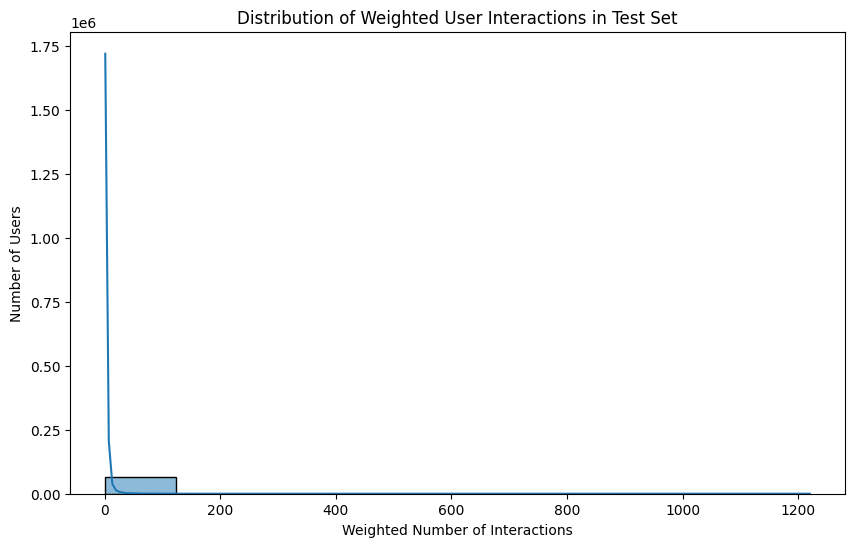

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate weighted interactions per user in the test set
user_weighted_interactions_test = test_data.groupby('visitorid')['event_encoded'].sum().reset_index()
user_weighted_interactions_test.rename(columns={'event_encoded': 'weighted_interactions'}, inplace=True)

# Create the histogram using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(user_weighted_interactions_test['weighted_interactions'], bins=10, kde=True)  # Adjust bins as needed
plt.title('Distribution of Weighted User Interactions in Test Set')
plt.xlabel('Weighted Number of Interactions')
plt.ylabel('Number of Users')
plt.show()

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from collections import defaultdict

# Mean Average Precision (MAP)
def mean_average_precision(recommendations, ground_truth, k=10):
    average_precisions = []
    for user, rec_items in recommendations.items():
        if user in ground_truth:
            relevant_items = ground_truth[user]
            precisions = []
            for i, item in enumerate(rec_items[:k]):
                if item in relevant_items:
                    precisions.append(len([r for r in rec_items[:i + 1] if r in relevant_items]) / (i + 1))
            average_precisions.append(np.mean(precisions) if precisions else 0)
    return np.mean(average_precisions) if average_precisions else 0

# Mean Rank
def mean_weighted_rank(recommendations, ground_truth):
    ranks = []

    for user, rec_items in recommendations.items():
        if user in ground_truth:
            for rank, item in enumerate(rec_items, start=1):
                if item in ground_truth[user]:
                    weight = ground_truth[user][item]  # Event importance: 3 > 2 > 1
                    ranks.append(rank / weight)  # Higher weight lowers impact of high ranks
                    break  # Stop after first match

    return np.mean(ranks) if ranks else float('inf')


# Normalized Discounted Cumulative Gain (NDCG@k)
def ndcg_at_k(recommendations, ground_truth, k=10):
    def dcg(relevances):
        return sum((rel / np.log2(idx + 2)) for idx, rel in enumerate(relevances))

    ndcg_scores = []

    for user, rec_items in recommendations.items():
        if user in ground_truth:
            # Get relevance scores for recommended items
            relevances = [ground_truth[user].get(item, 0) for item in rec_items[:k]]  # Default 0 if not in GT

            # Compute DCG and ideal DCG
            ideal_relevances = sorted(ground_truth[user].values(), reverse=True)[:k]

            dcg_score = dcg(relevances)
            idcg_score = dcg(ideal_relevances) if ideal_relevances else 1  # Prevent division by zero

            ndcg_scores.append(dcg_score / idcg_score)

    return np.mean(ndcg_scores) if ndcg_scores else 0

# Print evaluation results
print("Hit Rate @10:", weighted_hit_rate_at_k(recommendations, ground_truth, k=3))
print("Coverage:", coverage_metric())
print("Intra-List Similarity:", intra_list_similarity(model, recommendations))
print("MAP:", mean_average_precision(recommendations, ground_truth, k=3))  # New
print("Mean Weighted Rank:", mean_weighted_rank(recommendations, ground_truth))          # New
print("NDCG@10:", ndcg_at_k(recommendations, ground_truth, k=3))

Hit Rate @10: 1.1513176830882946e-05
Coverage: 8.71380615234375
Intra-List Similarity: 0.9919519239283009
MAP: 1.557632398753894e-05
Mean Weighted Rank: 1.0
NDCG@10: 1.557632398753894e-05


In [ ]:
# Check how many recommended items actually appear in the test dataset
recommended_items = set(item for recs in recommendations.values() for item in recs)
ground_truth_items = set(test_data['itemid'])

overlap = recommended_items.intersection(ground_truth_items)
print(f"Overlap between recommended and test set items: {len(overlap)} / {len(ground_truth_items)} ({len(overlap)/len(ground_truth_items) * 100:.2f}%)")


Overlap between recommended and test set items: 4 / 16384 (0.02%)


In [ ]:
train_ground_truth = (
    train_data.groupby('visitorid')
    .apply(lambda x: {item: x.loc[x['itemid'] == item, 'event_encoded'].values[0] for item in x['itemid'].unique()})
    .to_dict()
)

train_hit_rate = weighted_hit_rate_at_k(recommendations, train_ground_truth, k=10)
print(f"Train Hit Rate @10: {train_hit_rate}")


<ipython-input-38-58badd4d9b82>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: {item: x.loc[x['itemid'] == item, 'event_encoded'].values[0] for item in x['itemid'].unique()})


Train Hit Rate @10: 0.0


In [ ]:
import numpy as np
from sklearn.metrics import ndcg_score

def evaluate_recommendations(test_data, recommendations, top_n=10):
    precision_scores = []
    recall_scores = []
    ndcg_scores = []
    hit_rates = []
    mrr_scores = []

    for visitor_id, recommended_items in recommendations.items():
        # Get ground truth items for the visitor in the test data
        ground_truth_items = test_data[test_data['visitorid'] == visitor_id]['itemid'].unique()

        # Skip if no ground truth items exist for this visitor
        if len(ground_truth_items) == 0:
            continue

        # Calculate hits and relevant items
        hits = np.isin(recommended_items, ground_truth_items)
        num_hits = np.sum(hits)
        total_relevant = len(ground_truth_items)

        # Precision@k
        precision = num_hits / top_n
        precision_scores.append(precision)

        # Recall@k
        recall = num_hits / total_relevant if total_relevant > 0 else 0
        recall_scores.append(recall)

        # Hit Rate@k (at least one relevant item in the recommendations)
        hit_rate = 1 if num_hits > 0 else 0
        hit_rates.append(hit_rate)

        # NDCG@k
        relevance = [1 if item in ground_truth_items else 0 for item in recommended_items]
        ndcg = ndcg_score([relevance], [relevance], k=top_n)
        ndcg_scores.append(ndcg)

        # MRR (Mean Reciprocal Rank)
        for rank, item in enumerate(recommended_items, 1):
            if item in ground_truth_items:
                mrr = 1 / rank
                mrr_scores.append(mrr)
                break

    # Aggregate metrics
    avg_precision = np.mean(precision_scores) if precision_scores else 0
    avg_recall = np.mean(recall_scores) if recall_scores else 0
    avg_ndcg = np.mean(ndcg_scores) if ndcg_scores else 0
    avg_hit_rate = np.mean(hit_rates) if hit_rates else 0
    avg_mrr = np.mean(mrr_scores) if mrr_scores else 0

    return {
        "precision@10": avg_precision,
        "recall@10": avg_recall,
        "ndcg@10": avg_ndcg,
        "hit_rate@10": avg_hit_rate,
        "mrr": avg_mrr
    }

# Evaluate the recommendations
metrics = evaluate_recommendations(test_data, recommendations)
print("Evaluation Metrics:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

ValueError: Found array with 0 feature(s) (shape=(1, 0)) while a minimum of 1 is required.

In [ ]:
# Function to generate recommendations for a visitor
def recommend_items(visitor_id, model, top_n=10):
    try:
        # Get the visitor's embedding
        visitor_embedding = model.wv[visitor_id]

        # Compute similarity between the visitor and all items
        similarities = {}
        for item_id in model.wv.index_to_key:
            if graph.nodes[item_id]['type'] == 'item':  # Only consider item nodes
                item_embedding = model.wv[item_id]
                similarity = np.dot(visitor_embedding, item_embedding) / (
                    np.linalg.norm(visitor_embedding) * np.linalg.norm(item_embedding)
                )
                similarities[item_id] = similarity

        # Sort items by similarity and return the top N
        sorted_items = sorted(similarities.items(), key=lambda x: x[1], reverse=True)
        return [item[0] for item in sorted_items[:top_n]]
    except KeyError:
        # Handle cases where the visitor ID is not in the model's vocabulary
        return []

# Generate recommendations for all visitors in the test data
recommendations = {}
for visitor_id in test_data['visitorid'].unique():
    recommended_items = recommend_items(visitor_id, model, top_n=10)
    recommendations[visitor_id] = recommended_items

# Print the recommendations for the first few visitors
for visitor_id, recommended_items in list(recommendations.items())[:5]:
    print(f"Recommendations for visitor {visitor_id}: {recommended_items}")

Recommendations for visitor 1094964: []
Recommendations for visitor 1015928: []
Recommendations for visitor 879000: []
Recommendations for visitor 783500: []
Recommendations for visitor 1879: []


In [ ]:
# Get the most popular items in the training data
popular_items = train_data['itemid'].value_counts().index.tolist()

# Generate recommendations for all visitors in the test data
recommendations = {}
for visitor_id in test_data['visitorid'].unique():
    if visitor_id in model.wv:
        # Generate personalized recommendations using the trained model
        recommended_items = recommend_items(visitor_id, model, top_n=10)
    else:
        # Provide default recommendations for cold-start visitors
        recommended_items = popular_items[:10]
    recommendations[visitor_id] = recommended_items

# Print the recommendations for the first few visitors
for visitor_id, recommended_items in list(recommendations.items())[:5]:
    print(f"Recommendations for visitor {visitor_id}: {recommended_items}")

Recommendations for visitor 408838: ['133814', '165302', '378637', '40864', '338427', '233734', '323194', '416979', '432011', '215704']
Recommendations for visitor 33078: []
Recommendations for visitor 919922: ['133814', '165302', '378637', '40864', '338427', '233734', '323194', '416979', '432011', '215704']
Recommendations for visitor 1390872: []
Recommendations for visitor 542156: ['133814', '165302', '378637', '40864', '338427', '233734', '323194', '416979', '432011', '215704']


In [ ]:
import numpy as np
import pandas as pd

# Precision at K
def precision_at_k(recommended_items, actual_items, k):
    return len(set(recommended_items[:k]) & set(actual_items)) / k

# Recall at K
def recall_at_k(recommended_items, actual_items, k):
    return len(set(recommended_items[:k]) & set(actual_items)) / len(actual_items)

# Mean Reciprocal Rank (MRR)
def mean_reciprocal_rank(recommended_items, actual_items):
    for rank, item in enumerate(recommended_items, start=1):
        if item in actual_items:
            return 1 / rank
    return 0  # If no relevant item found

# Normalized Discounted Cumulative Gain (NDCG)
def ndcg_at_k(recommended_items, actual_items, k):
    dcg = 0
    idcg = 0
    for rank, item in enumerate(recommended_items[:k], start=1):
        if item in actual_items:
            dcg += 1 / np.log2(rank + 1)

    # Calculate Ideal DCG (IDCG)
    for rank in range(1, k+1):
        if rank <= len(actual_items):
            idcg += 1 / np.log2(rank + 1)

    return dcg / idcg if idcg != 0 else 0

# F1 Score
def f1_score(precision, recall):
    if precision + recall == 0:
        return 0
    return 2 * (precision * recall) / (precision + recall)

In [ ]:
def evaluate_recommendations(test_data, recommendations, k=10):
    # Get recommendations for all users in the test data
    all_recommended_items = [recommendations.get(user_id, []) for user_id in test_data['visitorid'].unique()]

    # Get actual items for all users in the test data
    all_actual_items = test_data.groupby('visitorid')['itemid'].apply(list).tolist()

    # Vectorize precision@k calculation
    precision_at_k_values = np.array([
        len(set(recommended[:k]) & set(actual)) / k
        for recommended, actual in zip(all_recommended_items, all_actual_items)
    ])

    # Vectorize recall@k calculation
    recall_at_k_values = np.array([
        len(set(recommended[:k]) & set(actual)) / len(actual) if len(actual) > 0 else 0  # Handle empty actual lists
        for recommended, actual in zip(all_recommended_items, all_actual_items)
    ])

    # Vectorize MRR calculation
    mrr_values = np.array([
        mean_reciprocal_rank(recommended, actual)
        for recommended, actual in zip(all_recommended_items, all_actual_items)
    ])

    # Vectorize NDCG@k calculation
    ndcg_values = np.array([
        ndcg_at_k(recommended, actual, k)
        for recommended, actual in zip(all_recommended_items, all_actual_items)
    ])

    # Aggregate results
    precision_at_k_avg = np.mean(precision_at_k_values)
    recall_at_k_avg = np.mean(recall_at_k_values)
    f1_avg = np.mean([f1_score(p, r) for p, r in zip(precision_at_k_values, recall_at_k_values)])
    mrr_avg = np.mean(mrr_values)
    ndcg_avg = np.mean(ndcg_values)

    return {
        'Precision@K': precision_at_k_avg,
        'Recall@K': recall_at_k_avg,
        'F1 Score': f1_avg,
        'MRR': mrr_avg,
        'NDCG@K': ndcg_avg
    }

In [ ]:
def get_relevant_items(test_data, interaction_threshold=1):
    """
    Gets relevant items for each user based on interaction threshold.

    Args:
        test_data (pd.DataFrame): DataFrame containing user-item interactions.
        interaction_threshold (int): Minimum number of interactions to consider an item relevant.

    Returns:
        dict: Dictionary where keys are user IDs and values are lists of relevant item IDs.
    """
    relevant_items = {}
    for user_id, group in test_data.groupby('visitorid'):
        # Filter for 'view' and 'addtocart' events to define relevance
        relevant_items[user_id] = group['itemid'][group['event'].map(lambda x: x in ['view', 'addtocart'])] \
            .value_counts()[group['itemid'][group['event'].map(lambda x: x in ['view', 'addtocart'])] \
            .value_counts() >= interaction_threshold].index.tolist()  # Apply interaction threshold

    return relevant_items

In [ ]:
# 1. Get relevant items for the sampled users (from the original test data)
sampled_users = list(recommendations.keys())
sampled_test_data = test_data[test_data['visitorid'].isin(sampled_users)]
relevant_items_sampled = get_relevant_items(sampled_test_data, interaction_threshold=1)  # Adjust threshold if needed

# 2. Evaluate the model using the existing recommendations and relevant items
# Change 'evaluate_model' to 'evaluate_recommendations'
evaluation_results = evaluate_recommendations(sampled_test_data, recommendations, k=10)

# 3. Display results
for metric, value in evaluation_results.items():
    print(f"{metric}: {value:.4f}")

KeyError: 'event'

In [ ]:
'''# Get the most popular items in the training data
popular_items = train_data['itemid'].value_counts().index.tolist()

# Update recommendations for cold-start visitors
for visitor_id in test_data['visitorid'].unique():
    if visitor_id not in model.wv:
        # Provide default recommendations (e.g., top 10 popular items)
        recommendations[visitor_id] = popular_items[:10]

In [ ]:
from sklearn.metrics import ndcg_score

# Function to evaluate recommendations using NDCG
def evaluate_ndcg(test_data, recommendations, top_n=10):
    ndcg_scores = []

    for visitor_id, recommended_items in recommendations.items():
        # Get ground truth items for the visitor in the test data
        ground_truth_items = test_data[test_data['visitorid'] == visitor_id]['itemid'].unique()

        # Create relevance scores (1 for relevant items, 0 for others)
        relevance = [1 if item in ground_truth_items else 0 for item in recommended_items]

        # Calculate NDCG
        if len(ground_truth_items) > 0:
            ndcg = ndcg_score([relevance], [relevance], k=top_n)
            ndcg_scores.append(ndcg)

    # Compute average NDCG
    avg_ndcg = np.mean(ndcg_scores)
    return avg_ndcg

# Evaluate the recommendations using NDCG
avg_ndcg = evaluate_ndcg(test_data, recommendations, top_n=10)
print(f"Average NDCG@10: {avg_ndcg}")

ValueError: Found array with 0 feature(s) (shape=(1, 0)) while a minimum of 1 is required.

In [ ]:
# Evaluate the recommendations
avg_precision, avg_recall = evaluate_recommendations(test_data, recommendations, top_n=10)
print(f"Average Precision@10: {avg_precision}")
print(f"Average Recall@10: {avg_recall}")

# Evaluate using NDCG (optional)
avg_ndcg = evaluate_ndcg(test_data, recommendations, top_n=10)
print(f"Average NDCG@10: {avg_ndcg}")

KeyboardInterrupt: 

In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import ParameterGrid, ParameterSampler
from scipy.stats import randint, uniform

# ... (Your previous code for loading data, creating graph, defining evaluation metrics, etc.) ...


def metapath_random_walk(graph, metapath, start_node, length):
    walk = [start_node]
    current_node = start_node

    for step in range(length):
        neighbors = list(graph.neighbors(current_node))
        if not neighbors:
            break
        current_node = np.random.choice(neighbors)  # Randomly pick a neighbor based on the metapath
        walk.append(current_node)
    return walk

def train_and_evaluate_model(params):
    """Trains and evaluates the model with given parameters."""

    # 1. Train Word2Vec model
    walks = []
    for node in graph.nodes:
        walks.append(metapath_random_walk(graph, metapath, node, length=params['walk_length']))

    model = Word2Vec(walks, vector_size=params['vector_size'], window=params['window'],
                     min_count=params['min_count'], workers=4, sg=params['sg'], epochs=params['epochs'])

    # 2. Generate recommendations for sampled test users
    recommendations = {}
    for visitor_id in sampled_test_data['visitorid'].unique():
        try:
            visitor_embedding = model.wv[visitor_id]
            similar_items = model.wv.most_similar(visitor_embedding, topn=10)
            recommendations[visitor_id] = [item[0] for item in similar_items]
        except KeyError:
            recommendations[visitor_id] = []  # Or some default recommendations

    # 3. Evaluate the model using the existing recommendations and relevant items on the entire test set
    evaluation_results = evaluate_recommendations(sampled_test_data, recommendations, k=10)

    return evaluation_results, model


# Define metapath
metapath = [('visitor', 'viewed', 'item'),
            ('item', 'belongs_to', 'category'),
            ('category', 'viewed', 'visitor')]

# Split data
event_df = event_df.sort_values(by=['timestamp'])
train_data, test_data = train_test_split(event_df, test_size=0.2, shuffle=False)
sampled_test_data = test_data.sample(frac=0.1, random_state=42)
relevant_items_sampled = get_relevant_items(sampled_test_data, interaction_threshold=1)

# Define hyperparameter search space
param_dist = {
    'vector_size': randint(32, 128),
    'window': randint(2, 10),
    'min_count': randint(1, 5),
    'sg': randint(0, 2),  # Use randint to sample 0 or 1 for sg
    'epochs': randint(5, 20),
    'walk_length': randint(10, 50)
}

# Perform random search
n_iter = 10  # Number of iterations for random search
best_score = 0
best_params = {}
best_model = None

for i in range(n_iter):
    # Sample random hyperparameters
    params = {k: v.rvs() if hasattr(v, 'rvs') else v for k, v in param_dist.items()}
    print(f"Iteration {i + 1}: Trying parameters: {params}")

    # Train and evaluate model
    results, model = train_and_evaluate_model(params)

    # Update best model if score improves
    score = results['NDCG@K']  # Use your desired metric here
    if score > best_score:
        best_score = score
        best_params = params
        best_model = model
        print(f"New best score: {best_score:.4f} with parameters: {best_params}")

# Print best results
print(f"\nBest NDCG@K: {best_score:.4f} achieved with parameters: {best_params}")

# Save the best model (optional)
best_model.save("best_metapath2vec_model")

In [ ]:
import numpy as np
import pandas as pd

# Precision at K
def precision_at_k(recommended_items, actual_items, k):
    return len(set(recommended_items[:k]) & set(actual_items)) / k

# Recall at K
def recall_at_k(recommended_items, actual_items, k):
    return len(set(recommended_items[:k]) & set(actual_items)) / len(actual_items)

# Mean Reciprocal Rank (MRR)
def mean_reciprocal_rank(recommended_items, actual_items):
    for rank, item in enumerate(recommended_items, start=1):
        if item in actual_items:
            return 1 / rank
    return 0  # If no relevant item found

# Normalized Discounted Cumulative Gain (NDCG)
def ndcg_at_k(recommended_items, actual_items, k):
    dcg = 0
    idcg = 0
    for rank, item in enumerate(recommended_items[:k], start=1):
        if item in actual_items:
            dcg += 1 / np.log2(rank + 1)

    # Calculate Ideal DCG (IDCG)
    for rank in range(1, k+1):
        if rank <= len(actual_items):
            idcg += 1 / np.log2(rank + 1)

    return dcg / idcg if idcg != 0 else 0

# F1 Score
def f1_score(precision, recall):
    if precision + recall == 0:
        return 0
    return 2 * (precision * recall) / (precision + recall)


In [ ]:
def evaluate_recommendations(test_data, recommendations, k=10):
    # Get recommendations for all users in the test data
    all_recommended_items = [recommendations.get(user_id, []) for user_id in test_data['visitorid'].unique()]

    # Get actual items for all users in the test data
    all_actual_items = test_data.groupby('visitorid')['itemid'].apply(list).tolist()

    # Vectorize precision@k calculation
    precision_at_k_values = np.array([
        len(set(recommended[:k]) & set(actual)) / k
        for recommended, actual in zip(all_recommended_items, all_actual_items)
    ])

    # Vectorize recall@k calculation
    recall_at_k_values = np.array([
        len(set(recommended[:k]) & set(actual)) / len(actual) if len(actual) > 0 else 0  # Handle empty actual lists
        for recommended, actual in zip(all_recommended_items, all_actual_items)
    ])

    # Vectorize MRR calculation
    mrr_values = np.array([
        mean_reciprocal_rank(recommended, actual)
        for recommended, actual in zip(all_recommended_items, all_actual_items)
    ])

    # Vectorize NDCG@k calculation
    ndcg_values = np.array([
        ndcg_at_k(recommended, actual, k)
        for recommended, actual in zip(all_recommended_items, all_actual_items)
    ])

    # Aggregate results
    precision_at_k_avg = np.mean(precision_at_k_values)
    recall_at_k_avg = np.mean(recall_at_k_values)
    f1_avg = np.mean([f1_score(p, r) for p, r in zip(precision_at_k_values, recall_at_k_values)])
    mrr_avg = np.mean(mrr_values)
    ndcg_avg = np.mean(ndcg_values)

    return {
        'Precision@K': precision_at_k_avg,
        'Recall@K': recall_at_k_avg,
        'F1 Score': f1_avg,
        'MRR': mrr_avg,
        'NDCG@K': ndcg_avg
    }

In [ ]:
import pandas as pd

def get_relevant_items(test_data, interaction_threshold=1):
    """
    Gets relevant items for each user based on interaction threshold.

    Args:
        test_data (pd.DataFrame): DataFrame containing user-item interactions.
        interaction_threshold (int): Minimum number of interactions to consider an item relevant.

    Returns:
        dict: Dictionary where keys are user IDs and values are lists of relevant item IDs.
    """
    relevant_items = {}
    for user_id, group in test_data.groupby('visitorid'):
        # Filter for 'view' and 'addtocart' events to define relevance
        relevant_items[user_id] = group['itemid'][group['event'].map(lambda x: x in ['view', 'addtocart'])] \
            .value_counts()[group['itemid'][group['event'].map(lambda x: x in ['view', 'addtocart'])] \
            .value_counts() >= interaction_threshold].index.tolist()  # Apply interaction threshold

    return relevant_items

In [ ]:
# Assuming you have 'recommendations', 'test_data', and the necessary functions (get_relevant_items, evaluate_recommendations)

# 1. Get relevant items for the sampled users (from the original test data)
sampled_users = list(recommendations.keys())
sampled_test_data = test_data[test_data['visitorid'].isin(sampled_users)]
relevant_items_sampled = get_relevant_items(sampled_test_data, interaction_threshold=1)  # Adjust threshold if needed

# 2. Evaluate the model using the existing recommendations and relevant items
# Change 'evaluate_model' to 'evaluate_recommendations'
evaluation_results = evaluate_recommendations(sampled_test_data, recommendations, k=10)

# 3. Display results
for metric, value in evaluation_results.items():
    print(f"{metric}: {value:.4f}")